In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.preprocessing import LabelEncoder

# Construção do Modelo
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/trabalho-final-AM/dataset/enron_spam_data.csv")
data.head()

,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14


# **Codificação de rótulo**

In [4]:
encoder = LabelEncoder()
data['Spam/Ham'] = encoder.fit_transform(data['Spam/Ham'])
data.head()

,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,0,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",0,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,0,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,0,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,0,1999-12-14


In [5]:
# Vetorização
tfidf = TfidfVectorizer(max_features=500)

data['Message'] = data['Message'].fillna('')

X = tfidf.fit_transform(data['Message']).toarray()
y = data['Spam/Ham']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X.shape

(33716, 500)

# **Construção do modelo**

In [7]:
# Criando o modelo
svc_classifier = SVC()

# Treinando o modelo
svc_classifier.fit(X_train, y_train)

# Prevendo as classes
y_pred_svc = svc_classifier.predict(X_test)

In [8]:
# Calculando as métricas
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test,y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)

print(f"SVM Acuracia: {accuracy_svc:.2f}")
print(f"Precisão:  {precision_svc:.2f}")
print(f"Recall:  {recall_svc:.2f}")
print(f"F1-score:  {f1_svc:.2f}")

SVM Acuracia: 0.98
Precisão:  0.97
Recall:  0.99
F1-score:  0.98


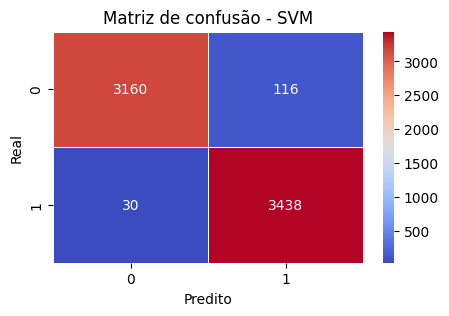

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Visualizar a correlação entre matriz usando a mapa de calor
plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix(y_test,y_pred_svc), annot=True, cmap='coolwarm', fmt=".0f", linewidths=.5)
plt.title('Matriz de confusão - SVM')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()